# Assignment 1 Deep Learning
## Marc Glowienke

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')
np.random.seed(123)

In [2]:
# Load in Data frame
df = pd.read_csv('iris.data', header = None)

# Add extra column to convert names to integers
df[5] = 10
for i in range(0,df.shape[0]):
    if df.iloc[i,4] == "Iris-setosa":
        df.iloc[i,5] = 0
    elif df.iloc[i,4] == 'Iris-versicolor':
        df.iloc[i,5] = 1
    elif df.iloc[i,4] == 'Iris-virginica':
        df.iloc[i,5] = 2
    else:
        print("break")
        break

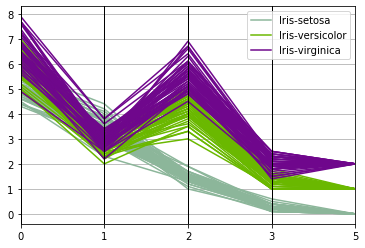

In [3]:
from pandas.plotting import parallel_coordinates
plt.figure()
parallel_coordinates(df,4)
plt.show()

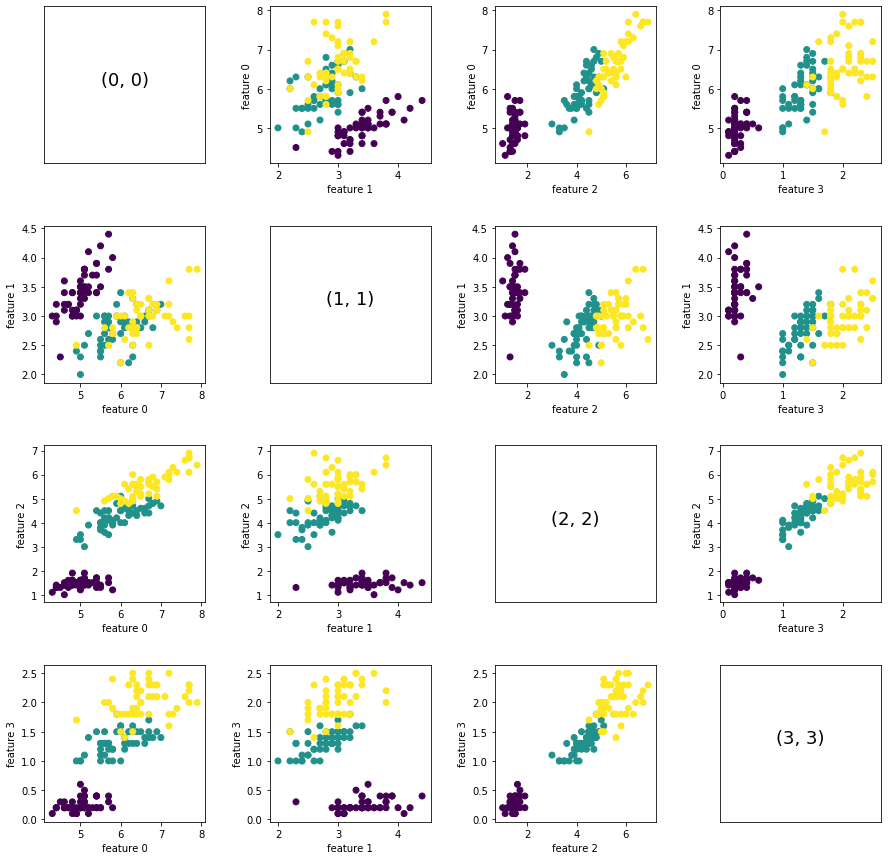

In [4]:
fig, ax = plt.subplots(4, 4,figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(4):
    for j in range(4):
        if i == j:
            ax[j, i].text(0.5, 0.5, str((j, i)),
                      fontsize=18, ha='center')
            ax[j,i].set_xticks([])
            ax[j,i].set_yticks([])
        else:
            ax[j, i].scatter(df[i],df[j],c = df[5])
            ax[j, i].set(xlabel='feature %d' %i, ylabel='feature %d' %j)

In [5]:
fig.savefig("complete_dataset.pdf")

## (b) + (c) + (d) + (e)

In [6]:
# sigmoid function which takes data x and weights x as input
def sigmoid(w,x):
    z = np.dot(x,w)
    return 1 / (1 + np.exp(-z))

In [7]:
# loss function
def get_loss(w,x,y):
    h = sigmoid(w,x)
    return (-y * np.log(h) - (1-y) * np.log(1-h)).sum()/x.shape[0]
def get_loss_regularized(w,x,y,reg_rate):
    h = sigmoid(w,x)
    return (-y * np.log(h) - (1-y) * np.log(1-h)).sum()/x.shape[0] + reg_rate/2 * (w[1:]**2).sum()/x.shape[0]

In [8]:
# function for gradient to minimize
def gradient(w,x,y):
    return np.dot(x.T,(sigmoid(w,x)-y)) / y.shape[0]

In [9]:
# prediction functions to control accuracy
def predict(w,x,threshold = 0.5):
    return np.multiply(sigmoid(w,x) >= 0.5,1)

def evaluate(w,x,y):
    prediction = predict(w,x)
    T1 = 0
    F1 = 0
    T0 = 0
    F0 = 0
    for i in range(y.shape[0]):
        if y[i] == 0 and prediction[i] == 0:
            T0 += 1
            #print("T0 %d" %T0)
        elif y[i] == 1 and prediction[i] == 0:
            F0 += 1
            #print("F0 %d" %F0)
        elif y[i] == 1 and prediction[i] == 1:
            T1 += 1
            #print("T1 %d" %T1)
        elif y[i] == 0 and prediction[i] == 1:
            F1 += 1
            #print("F1 %d" %F1)
        else:
            print("error in evaluation")
            break
    return (T1+T0)/(T1+T0+F1+F0)

In [10]:
### LOGISTIC REGRESSION, no regularization --> putting it together
# takes as input the features to be selected, learning rate and number of iterations

def logistic_regression(feature_1, feature_2,learning_rate,num_iterations,df = df):
    # select correct data features
    sample_number = 100
    df_modified = pd.concat([df[feature_1],df[feature_2],df.iloc[:,-1]],axis=1,keys=[0,1,2]) # select features for analysis
    data = df_modified[:-(len(df)-sample_number)] # reduce sample size to 100
    
    # add intercept
    intercept = np.ones(sample_number)

    # initialize weights
    w = np.random.rand(3,1)
    # define x and y
    x = np.array([intercept,data[0],data[1]]).T
    y = np.array([data[2]]).T

    accuracy_track = np.zeros(num_iterations)
    for iteration in range(num_iterations):
        w_old = w
        w = w_old - learning_rate * gradient(w,x,y)

        accuracy_track[iteration] = evaluate(w,x,y) # keep track of current accuracy to check for convergence

    y_pred = predict(w,x)
    classification_wrong_marked = pd.DataFrame(np.abs(y_pred-y)) # every wrong classified instance will have value 1
    data_2 = pd.concat([data[0],data[1],classification_wrong_marked],axis=1,keys=[0,1,2])    
    
    fig, ax = plt.subplots(1, 3,figsize=(15,5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    ax[0].scatter(data[0],data[1],c=data[2])
    ax[0].set(xlabel='feature %d' %feature_1, ylabel='feature %d' %feature_2)
    ax[0].title.set_text("Scatter plot of samples")
    
    ax[1].plot(accuracy_track)
    ax[1].set(xlabel="# of iterations", ylabel="Accuracy")
    ax[1].title.set_text("Accuracy over iterations")
    ax[1].text(0.5*num_iterations,0.7*(np.amax(accuracy_track)-np.amin(accuracy_track))+np.amin(accuracy_track),"Accuracy after \n last iteration: %.3f" %evaluate(w,x,y))
    
    ax[2].scatter(data_2[0],data_2[1],c=data_2[2])#classification
    ax[2].set(xlabel='feature %d' %feature_1, ylabel='feature %d' %feature_2)
    ax[2].title.set_text("Scatter plot, wrong classification (if present) is marked yellow")
    plt.show()
    print('Loss value: %.4f' %get_loss(w,x,y))

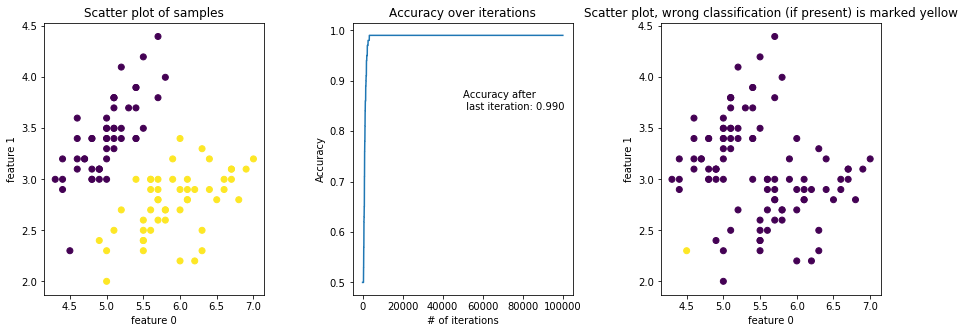

Loss value: 0.1033


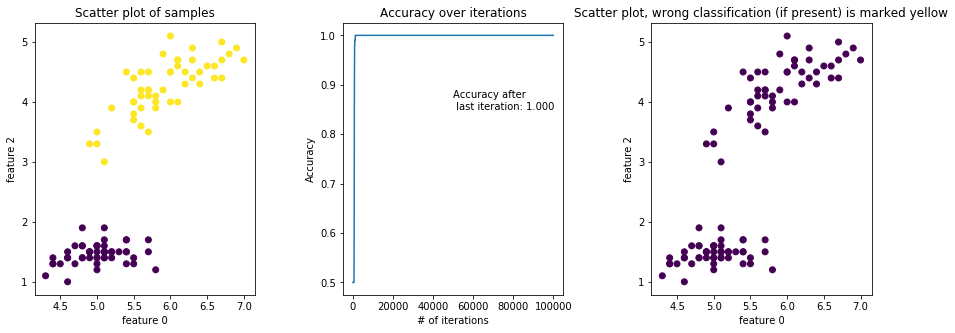

Loss value: 0.0147


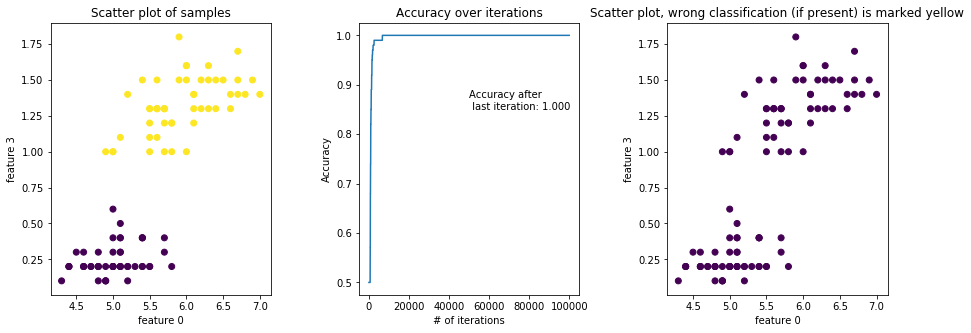

Loss value: 0.0658


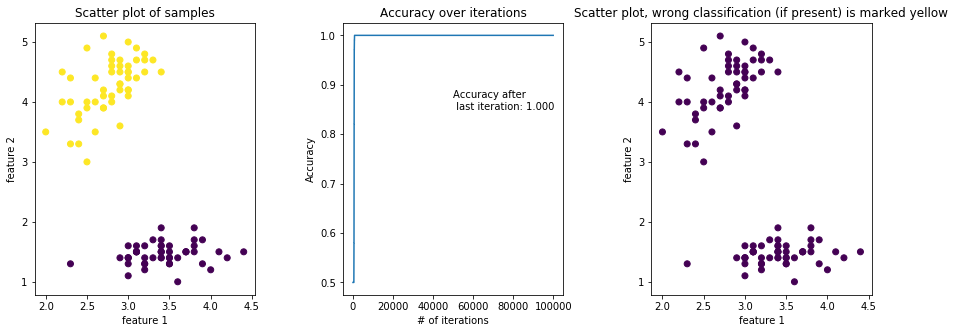

Loss value: 0.0096


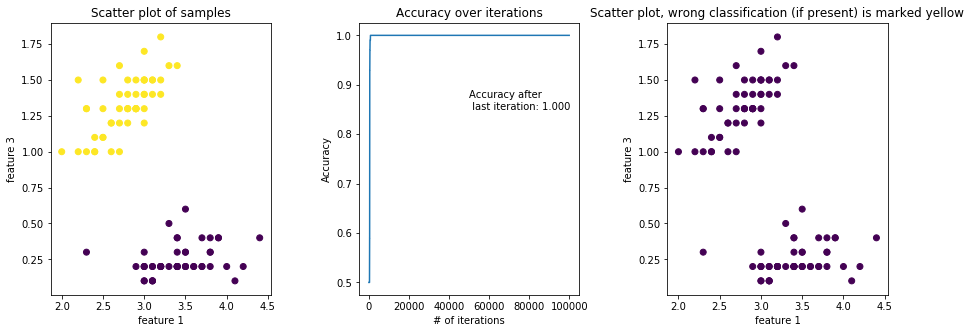

Loss value: 0.0373


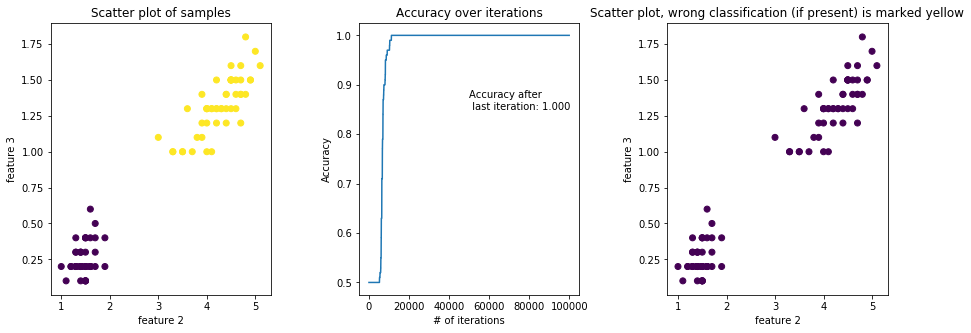

Loss value: 0.0553


In [11]:
for i in range(4):
    for j in range(i+1,4):
        if i==j:
            print()
        else:
            logistic_regression(i,j,0.001,100000)

In [12]:
def logistic_regression_regularized(feature_1, feature_2,learning_rate,reg_rate,num_iterations,df = df):
    # select correct data features
    sample_number = 100
    df_modified = pd.concat([df[feature_1],df[feature_2],df.iloc[:,-1]],axis=1,keys=[0,1,2]) # select features for analysis
    data = df_modified[:-(len(df)-sample_number)] # reduce sample size to 100
    
    # add intercept
    intercept = np.ones(sample_number)

    # initialize weights
    w = np.random.rand(3,1)
    # define x and y
    x = np.array([intercept,data[0],data[1]]).T
    y = np.array([data[2]]).T

    accuracy_track = np.zeros(num_iterations)
    for iteration in range(num_iterations):
        w_old = w
        w[0] = w_old[0] - learning_rate * gradient(w,x,y)[0]
        w[1:2] = w_old[1:2] - learning_rate * (gradient(w,x,y)[1:2] + (reg_rate/y.shape[0]) * w_old[1:2])

        accuracy_track[iteration] = evaluate(w,x,y) # keep track of current accuracy to check for convergence

    y_pred = predict(w,x)
    classification_wrong_marked = pd.DataFrame(np.abs(y_pred-y)) # every wrong classified instance will have value 1
    data_2 = pd.concat([data[0],data[1],classification_wrong_marked],axis=1,keys=[0,1,2])    
    
    fig, ax = plt.subplots(1, 3,figsize=(15,5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    ax[0].scatter(data[0],data[1],c=data[2])
    ax[0].set(xlabel='feature %d' %feature_1, ylabel='feature %d' %feature_2)
    ax[0].title.set_text("Scatter plot of samples")
    
    ax[1].plot(accuracy_track)
    ax[1].set(xlabel="# of iterations", ylabel="Accuracy")
    ax[1].title.set_text("Accuracy over iterations")
    ax[1].text(0.5*num_iterations,0.7*(np.amax(accuracy_track)-np.amin(accuracy_track))+np.amin(accuracy_track),"Accuracy after \n last iteration: %.3f" %evaluate(w,x,y))
    
    ax[2].scatter(data_2[0],data_2[1],c=data_2[2])#classification
    ax[2].set(xlabel='feature %d' %feature_1, ylabel='feature %d' %feature_2)
    ax[2].title.set_text("Scatter plot, wrong classification (if present) is marked yellow")
    plt.show()
    print('Loss value: %.4f' %get_loss_regularized(w,x,y,reg_rate))

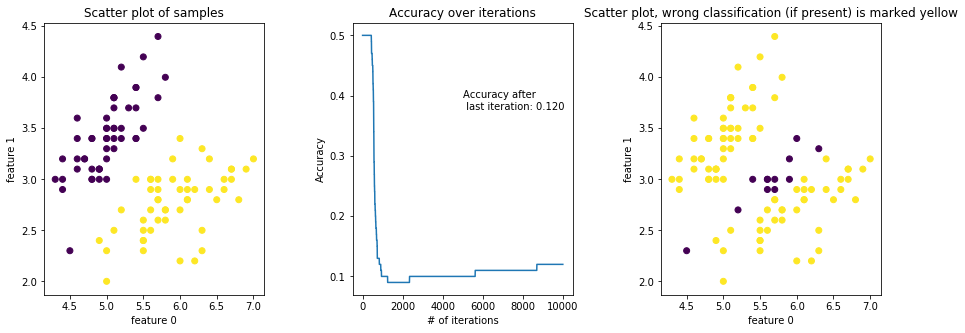

Loss value: 0.8901


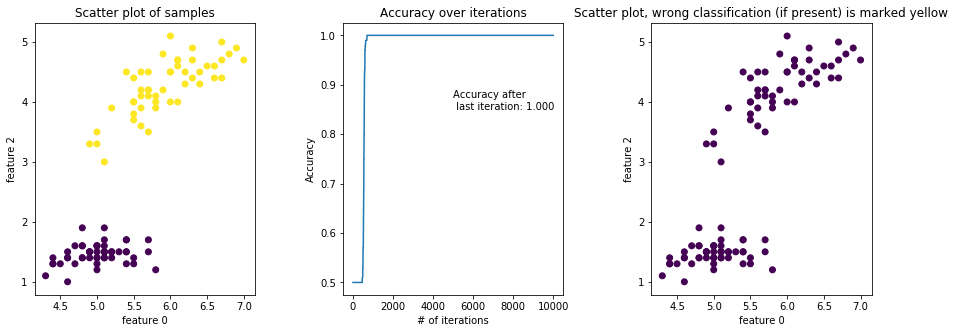

Loss value: 0.4137


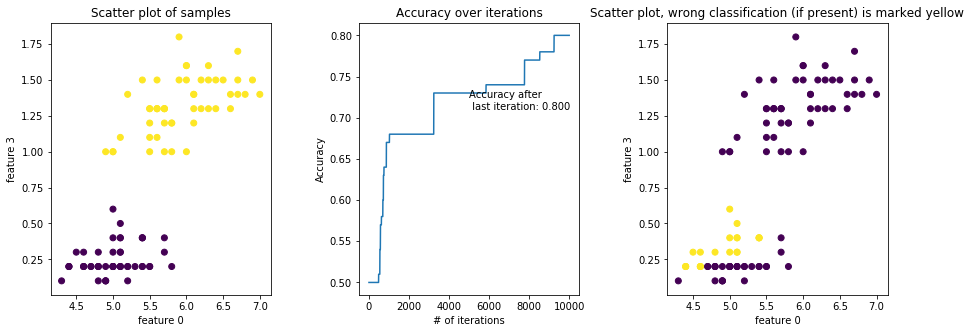

Loss value: 0.6185


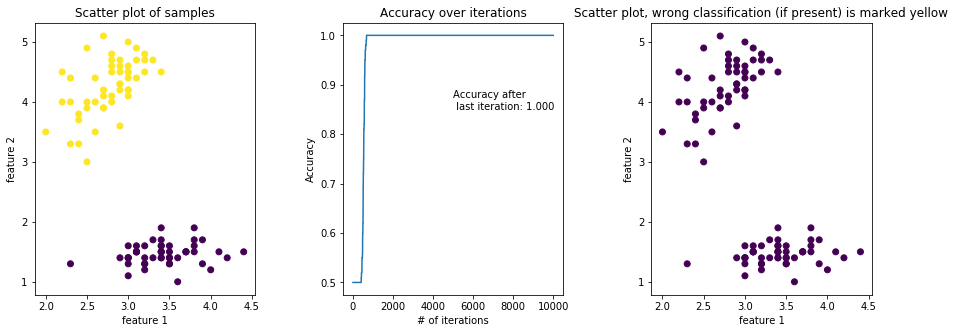

Loss value: 0.2966


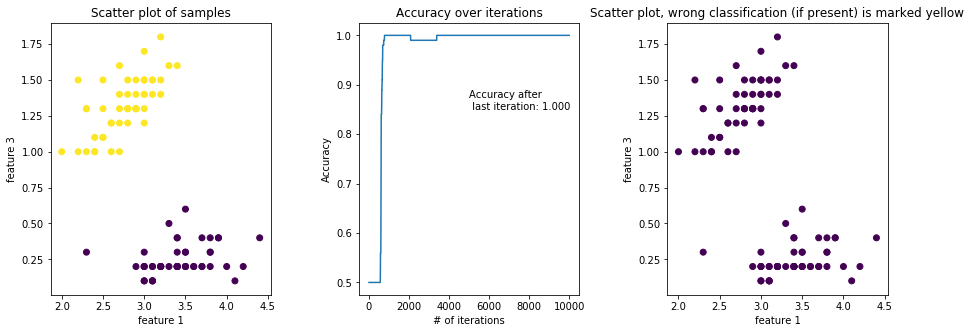

Loss value: 0.5516


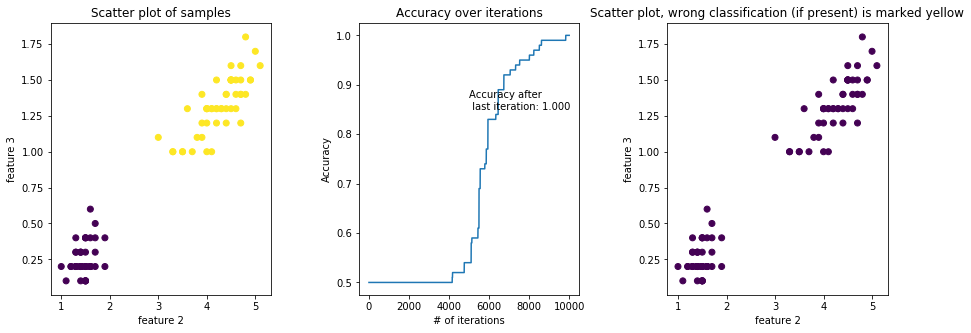

Loss value: 0.3742


In [13]:
for i in range(4):
    for j in range(i+1,4):
        if i==j:
            print()
        else:
            logistic_regression_regularized(i,j,0.001,0.5,10000)

## (f)

In [14]:
def logistic_regression_automatic(features,learning_rate,num_iterations, df = df,cut_off = 50):
    # select correct data features
    feature_number = len(features)
    df_modified = pd.concat([df.iloc[:,features],df.iloc[:,-1]],axis=1) # select features for analysis
    df_modified.columns = list(range(feature_number+1))
    if cut_off > 0:
        data = df_modified.iloc[:-cut_off,:] # reduce sample size to 100
    else:
        data = df_modified

    # add intercept
    intercept = np.ones(len(data))

    # initialize weights
    w = np.random.rand(feature_number+1,1)
    # define x and y
    x = np.column_stack([intercept,data.iloc[:,:-1]])
    y = np.array([data.iloc[:,-1]]).T

    accuracy_track = np.zeros(num_iterations)
    for iteration in range(num_iterations):
        w_old = w
        w = w_old - learning_rate * gradient(w,x,y)

        accuracy_track[iteration] = evaluate(w,x,y) # keep track of current accuracy to check for convergence

    if feature_number <= 2:
        feature_1 = features[0]
        feature_2 = features[1]
        y_pred = predict(w,x)
        classification_wrong_marked = pd.DataFrame(np.abs(y_pred-y)) # every wrong classified instance will have value 1
        data_2 = pd.concat([data[0],data[1],classification_wrong_marked],axis=1,keys=[0,1,2])    

        fig, ax = plt.subplots(1, 3,figsize=(15,5))
        fig.subplots_adjust(hspace=0.4, wspace=0.4)

        ax[0].scatter(data[0],data[1],c=data[2])
        ax[0].set(xlabel='feature %d' %feature_1, ylabel='feature %d' %feature_2)
        ax[0].title.set_text("Scatter plot of samples")

        ax[1].plot(accuracy_track)
        ax[1].set(xlabel="# of iterations", ylabel="Accuracy")
        ax[1].title.set_text("Accuracy over iterations")
        ax[1].text(0.5*num_iterations,0.7*(np.amax(accuracy_track)-np.amin(accuracy_track))+np.amin(accuracy_track),"Accuracy after \n last iteration: %.3f" %evaluate(w,x,y))

        ax[2].scatter(data_2[0],data_2[1],c=data_2[2])#classification
        ax[2].set(xlabel='feature %d' %feature_1, ylabel='feature %d' %feature_2)
        ax[2].title.set_text("Scatter plot, wrong classification (if present) is marked yellow")
        plt.show()
    else:
        plt.plot(accuracy_track)
        plt.xlabel('Number of Iterations')
        plt.ylabel('Accuracy')
        plt.text(0.5*num_iterations,0.7*(np.amax(accuracy_track)-np.amin(accuracy_track))+np.amin(accuracy_track),"Accuracy after \n last iteration: %.3f" %evaluate(w,x,y))
    print('Loss value: %.4f' %get_loss(w,x,y))
    return w

In [15]:
def logistic_regression_automatic_regularized(features,learning_rate,reg_rate,num_iterations,df = df,cut_off = 50):
    # select correct data features
    feature_number = len(features)
    df_modified = pd.concat([df.iloc[:,features],df.iloc[:,-1]],axis=1) # select features for analysis
    df_modified.columns = list(range(feature_number+1))
    if cut_off > 0:
        data = df_modified.iloc[:-cut_off,:] # reduce sample size to 100
    else:
        data = df_modified

    # add intercept
    intercept = np.ones(len(data))

    # initialize weights
    w = np.random.rand(feature_number+1,1)
    # define x and y
    x = np.column_stack([intercept,data.iloc[:,:-1]])
    y = np.array([data.iloc[:,-1]]).T

    accuracy_track = np.zeros(num_iterations)
    for iteration in range(num_iterations):
        w_old = w
        w[0] = w_old[0] - learning_rate * gradient(w,x,y)[0]
        w[1:2] = w_old[1:2] - learning_rate * (gradient(w,x,y)[1:2] + (reg_rate/y.shape[0]) * w_old[1:2])

        accuracy_track[iteration] = evaluate(w,x,y) # keep track of current accuracy to check for convergence

    if feature_number <= 2:
        feature_1 = features[0]
        feature_2 = features[1]
        y_pred = predict(w,x)
        classification_wrong_marked = pd.DataFrame(np.abs(y_pred-y)) # every wrong classified instance will have value 1
        data_2 = pd.concat([data[0],data[1],classification_wrong_marked],axis=1,keys=[0,1,2])    

        fig, ax = plt.subplots(1, 3,figsize=(15,5))
        fig.subplots_adjust(hspace=0.4, wspace=0.4)

        ax[0].scatter(data[0],data[1],c=data[2])
        ax[0].set(xlabel='feature %d' %feature_1, ylabel='feature %d' %feature_2)
        ax[0].title.set_text("Scatter plot of samples")

        ax[1].plot(accuracy_track)
        ax[1].set(xlabel="# of iterations", ylabel="Accuracy")
        ax[1].title.set_text("Accuracy over iterations")
        ax[1].text(0.5*num_iterations,0.7*np.amax(accuracy_track),"Accuracy after \n last iteration: %.3f" %evaluate(w,x,y))

        ax[2].scatter(data_2[0],data_2[1],c=data_2[2])#classification
        ax[2].set(xlabel='feature %d' %feature_1, ylabel='feature %d' %feature_2)
        ax[2].title.set_text("Scatter plot, wrong classification (if present) is marked yellow")
        plt.show()
    else:
        plt.plot(accuracy_track)
        plt.xlabel('Number of Iterations')
        plt.ylabel('Accuracy')
        plt.text(0.5*num_iterations,0.7*(np.amax(accuracy_track)-np.amin(accuracy_track))+np.amin(accuracy_track),"Accuracy after \n last iteration: %.3f" %evaluate(w,x,y))
    print('Loss value: %.4f' %get_loss_regularized(w,x,y,reg_rate))
    return w

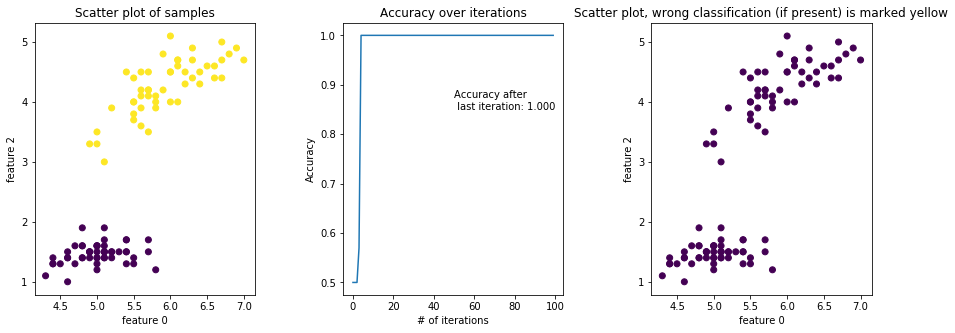

Loss value: 0.1042


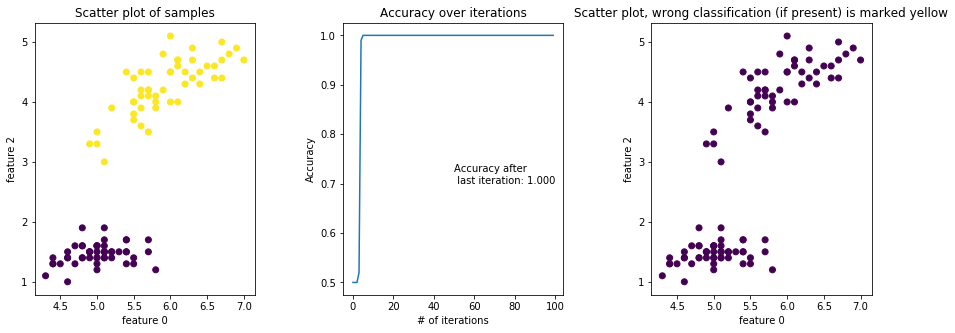

Loss value: 0.4139


array([[ 0.03171031],
       [-0.28852023],
       [ 0.58593655]])

In [23]:
# features to be chosen have to be entered as list
logistic_regression_automatic([0,2],0.1,100)
logistic_regression_automatic_regularized([0,2],0.1,0.5,100)

## (g)

In [17]:
def test(features,df,w):
    # select correct data features
    feature_number = len(features)
    df_modified = pd.concat([df.iloc[:,features],df.iloc[:,-1]],axis=1) # select features for analysis
    df_modified.columns = list(range(feature_number+1))
    data = df_modified

    # add intercept
    intercept = np.ones(len(data))

    # define x and y
    x = np.column_stack([intercept,data.iloc[:,:-1]])
    y = np.array([data.iloc[:,-1]]).T
    
    print('Test accuracy: %.4f \n' %evaluate(w,x,y)) #evaluate accuracy
    print('Test Loss value: %.4f' %get_loss(w,x,y))

In [18]:
df_monk = pd.read_csv('monk2.csv', header = None)
df_training = df_monk.iloc[0:int(np.floor(df_monk.shape[0]*0.8)),:]
df_test = df_monk.iloc[(int(np.floor(df_monk.shape[0]*0.8))+1):,:]

Loss value: 0.4306


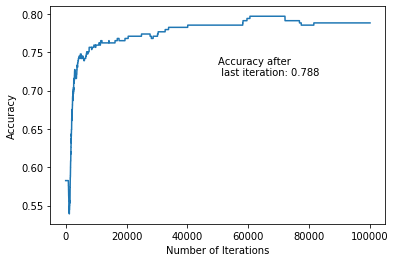

In [19]:
w_1 = logistic_regression_automatic([0,1,2,3,4,5],0.001,100000,df = df_training,cut_off = 0)

In [20]:
test([0,1,2,3,4,5],df = df_test,w = w_1)

Test accuracy: 0.7209 

Test Loss value: 0.5366


Loss value: 1.2858


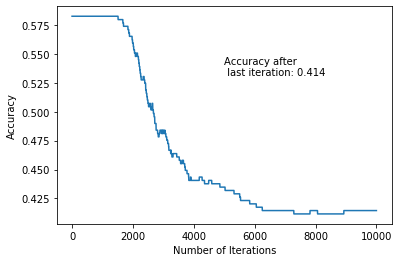

In [21]:
w_2 = logistic_regression_automatic_regularized([0,1,2,3,4,5],0.001,0.01,10000,df = df_training,cut_off = 0)

In [22]:
test([0,1,2,3,4,5],df = df_test,w = w_2)

Test accuracy: 0.3023 

Test Loss value: 1.1877
